## &#128205; Basic Setups

In [ ]:
# Install pip packages in the current Jupyter kernel
# https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/ 
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib==3.0.3
!{sys.executable} -m pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
 
# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우가 많다. 
# 그런 보기 싫은 부분들을 제거해주겠다.
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline 

In [ ]:
# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 할 수 있음
import os
os.getcwd() # 현재 디렉토리 파악
# os.chdir(r"__") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

**쥬피터 노트북에서 시각화할때, matplotlib가 한글 폰트 지원하지 않아, 깨짐 처리해줘야 함**

In [3]:
# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import matplotlib.pyplot as plt 
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    print('changed')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)
    print('changed')

changed


## &#128205; 1. 데이터프레임 확인

In [4]:
df=pd.read_csv("nyc_citibike.csv",encoding='euc-kr') # 한글이 들어간 csv는 encoding 인자를 넣어주는 것이 좋음
df.head()

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register
0,2018-05-01,2018-05-01,4,4,390,3002,South End Ave & Liberty St,40.711512,-74.015756,79,Franklin St & W Broadway,40.719116,-74.006667,21105,Subscriber,1945,male,36
1,2018-05-01,2018-05-01,1,1,854,3611,Vernon Blvd & 47 Rd,40.744907,-73.953457,3572,34 Ave & 38 St,40.756913,-73.921631,32219,Subscriber,1998,male,29
2,2018-05-01,2018-05-01,4,4,526,515,W 43 St & 10 Ave,40.760094,-73.994618,388,W 26 St & 10 Ave,40.749718,-74.002950,33433,Subscriber,1954,male,55
3,2018-05-01,2018-05-01,3,3,885,3641,Broadway & W 25 St,40.742869,-73.989186,336,Sullivan St & Washington Sq,40.730477,-73.999061,32028,Subscriber,1963,male,32
4,2018-05-01,2018-05-01,1,1,324,3440,Fulton St & Adams St,40.692418,-73.989495,3308,Kane St & Clinton St,40.686176,-73.996453,26425,Subscriber,1965,male,34


In [5]:
# 데이터 shape 파악
df.shape

(72035, 18)

In [6]:
# 데이터 통계량 파악
df.describe().round()

,start_hour,end_hour,trip_duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,birth_year,day_since_register
count,72035.0,72035.0,72035.0,72035.0,72035.0,72035.0,72035.0,72035.0,72035.0,72035.0,72035.0,72035.0
mean,14.0,14.0,1047.0,1536.0,41.0,-74.0,1537.0,41.0,-74.0,26140.0,1978.0,30.0
std,5.0,5.0,8140.0,1418.0,0.0,0.0,1420.0,0.0,0.0,5794.0,12.0,17.0
min,0.0,0.0,61.0,72.0,41.0,-74.0,72.0,41.0,-74.0,14529.0,1885.0,1.0
25%,10.0,10.0,398.0,382.0,41.0,-74.0,382.0,41.0,-74.0,20533.0,1969.0,15.0
50%,15.0,15.0,681.0,504.0,41.0,-74.0,503.0,41.0,-74.0,27840.0,1980.0,30.0
75%,18.0,18.0,1201.0,3223.0,41.0,-74.0,3224.0,41.0,-74.0,30995.0,1988.0,46.0
max,23.0,23.0,1344462.0,3680.0,41.0,-74.0,3680.0,41.0,-74.0,33671.0,2002.0,60.0


In [7]:
# 결측치 개수 파악
# 셀 실행 결과를 데이터프레임으로 보고 싶을 때 to_frame()과 pd.DataFrame() 두 가지를 사용 가능
df.isnull().sum().to_frame('nan_count') 

,nan_count
start_date,0
end_date,0
start_hour,0
end_hour,0
trip_duration,0
start_station_id,0
start_station_name,0
start_station_latitude,0
start_station_longitude,0
end_station_id,0


In [8]:
# 결측치 비율 파악
pd.DataFrame(data=df.isnull().sum()/len(df),columns=['nan_ratio'])

,nan_ratio
start_date,0.0
end_date,0.0
start_hour,0.0
end_hour,0.0
trip_duration,0.0
start_station_id,0.0
start_station_name,0.0
start_station_latitude,0.0
start_station_longitude,0.0
end_station_id,0.0


**결측치가 있다면 결측치에 대한 전처리를 거쳐줘야 한다.** 현 예시에서는 없으니, 패스!<br/> [결측치 제거 참고](https://eda-ai-lab.tistory.com/14)

In [9]:
# 변수 타입 파악
df.dtypes 

start_date                  object
end_date                    object
start_hour                   int64
end_hour                     int64
trip_duration                int64
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
usertype                    object
birth_year                   int64
gender                      object
day_since_register           int64
dtype: object

#### 시각화에서 중요한 건 범주형변수, 연속형변수 두가지로 구분하고 시작하는 것
> 범주형 변수 : 빈도(frequency) 계산 가능 <br/>
> 연속형 변수 : 평균, 표준편차, 분산 등의 수학적 계산 가능


- dtypes로 전체 변수 타입을 확인할때, 범주형이어도 연속형 변수 dtype일 수 있다 <br/>
- 이 예시에서는 trip_duration, day_since_register 연속형 변수, 그 외는 다 범주형<br/>
- 실제로 연속형이 아닌데, int64(연속형)인 변수들을 string으로 만들어준다

In [10]:
df['start_station_id']=df['start_station_id'].astype(str)
df['end_station_id']=df['end_station_id'].astype(str)
df['bike_id']=df['bike_id'].astype(str)

In [11]:
df.dtypes

start_date                  object
end_date                    object
start_hour                   int64
end_hour                     int64
trip_duration                int64
start_station_id            object
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id              object
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                     object
usertype                    object
birth_year                   int64
gender                      object
day_since_register           int64
dtype: object

## &#128205; 2. 데이터 도메인과 변수 이해
먼저, 가지고 있는 데이터에 대해서 이해하기 위해서는 어떤 변수들이 있는지 그리고 각 변수들의 의미와 풀고자하는 문제 간의 연관성 등을 파악해야 한다.
* 변수 이름
* 변수 타입 
* 변수들의 Segmentation
  >nyc_citibike 예시에서는. 이렇게 Segmentation 해볼 수 있다.
  >* 주행시간 변수 (start_date, end_date, start_hour, end_hour, trip_duration)
  >* 주행위치 변수 (start_station_id,start_station_name, start_station_latitude, start_station_longitutde, end_station_id,end_station_name, end_station_latitude, end_station_longitude)
  >* 대여바이크종류 변수 (bike_id)
  >* 유저정보 변수 (usertype, birth_year, gender,day_since_register)

* 단변수 분석에서, 변수들에 대해 알고 싶은 정보를 생각해낸다.
    > * 평균적 trip_duration은 얼마일까?
    > * 가장 기록(=대여 건 수)이 많은 start_hour는 언제일까?
    > * 유저들 성별 분포는 어떨까?

* 서로 영향을 줄 변수들에 대한 기대 가설을 세워본다.
    >* 신규 가입자들이 한번 탈 때 더 짧게 쓰지 않을까?
    >* gender에 따라 trip_duration이 다르지 않을까? 어떻게 다를까?
    > * start_hour이 새벽 시간대일수록 trip_duration이 짧지 않을까?

* 실제 EDA 후 기대한 가설과 결과를 보고 해석한다.

## &#128205; 3. QUEST Solutions
정해진 답이 없어요, 다들 잘 해주셔서 감사합니다.

### 3.1 

연령대(ex.10,20,30,40대) 변수와 함께 어떤 변수와의 관계를 보면 좋을지 기대 가설을 세우고, 적절한 방식으로 시각화 후 해석 보태 주세요.
연령은 25세, 26세~ 아닌 20대의 BIN 형태 연령대 (범주형 변수)로 묶어주세요.

[참고](https://nittaku.tistory.com/124)

In [12]:
# 현재 시간을 불러오는 패키지와 함수
import datetime
now = datetime.datetime.now()
now

datetime.datetime(2019, 10, 12, 11, 46, 30, 645264)

In [13]:
# 연도 추출
now.year

2019

In [14]:
# 출생연도 이용하여 나이로 변환 (미국이니까 연도 기반 만 나이로 변환)
df['age'] = now.year - df['birth_year']

In [15]:
df['age'].describe()

count    72035.000000
mean        41.005053
std         11.868175
min         17.000000
25%         31.000000
50%         39.000000
75%         50.000000
max        134.000000
Name: age, dtype: float64

In [16]:
# 연령대 숫자 데이터를 카테고리화
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
bin_names = [10, 20, 30, 40, 50, 60, 70, 80]

age_bin_series = pd.cut(df['age'], bins, labels = bin_names)
df['age_bin'] = age_bin_series

In [17]:
df['age_bin'].describe()

count     71961
unique        8
top          30
freq      21863
Name: age_bin, dtype: int64

In [18]:
# pd.cut 함수는 카테고리 자료형(범주형 데이터) 
df.dtypes

start_date                   object
end_date                     object
start_hour                    int64
end_hour                      int64
trip_duration                 int64
start_station_id             object
start_station_name           object
start_station_latitude      float64
start_station_longitude     float64
end_station_id               object
end_station_name             object
end_station_latitude        float64
end_station_longitude       float64
bike_id                      object
usertype                     object
birth_year                    int64
gender                       object
day_since_register            int64
age                           int64
age_bin                    category
dtype: object

**연령대 분포 확인**

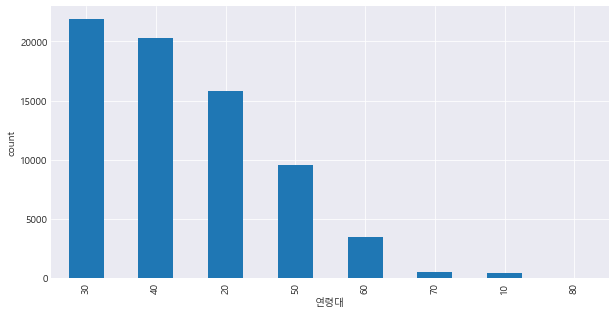

In [19]:
plt.figure(figsize=(10,5))
df['age_bin'].value_counts(ascending=False).plot(kind='bar')
plt.xlabel("연령대")
plt.ylabel("count")
plt.show()

> 20대가 많이 이용할 것이라고 생각한 것과 달리, 30대 40대가 주 사용 연령층이다. 30 40대면 주로 직장인의 연령대인데, 그럼 주로 출퇴근할 때 이용하나? <br/> **그럼, 대여 및 반납 시간대가 연령대별로 양상이 다르지 않을까?**

**가설 설정** <br/>
주 사용 연령층이 30-40대, 출퇴근 시간대에 대여한 기록이 많을 것이다. <br/><br/>
**가능 액션** <br/>
출퇴근 시간대 가격 인상

In [20]:
# 히트맵을 그리자
base= df.groupby(['age_bin','start_hour'])['bike_id'].count().unstack()
base

start_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
age_bin,,,,,,,,,,,,,,,,,,,,,
10,4.0,2.0,NaN,2.0,1.0,2.0,6.0,30.0,29.0,16.0,...,29.0,45.0,26.0,41.0,31.0,26.0,27.0,15.0,13.0,8.0
20,74.0,25.0,26.0,14.0,15.0,86.0,414.0,848.0,1520.0,935.0,...,534.0,559.0,799.0,1652.0,2123.0,1550.0,1063.0,734.0,483.0,264.0
30,66.0,45.0,22.0,12.0,22.0,128.0,601.0,1175.0,2152.0,1465.0,...,848.0,904.0,1276.0,2492.0,2770.0,1903.0,1238.0,792.0,549.0,300.0
40,61.0,27.0,24.0,29.0,19.0,134.0,427.0,985.0,1652.0,1182.0,...,1235.0,1259.0,1532.0,2299.0,1976.0,1326.0,781.0,544.0,359.0,236.0
50,23.0,9.0,3.0,7.0,14.0,95.0,308.0,686.0,961.0,520.0,...,522.0,538.0,767.0,1050.0,948.0,608.0,378.0,215.0,131.0,84.0
60,9.0,2.0,5.0,2.0,5.0,29.0,97.0,219.0,312.0,187.0,...,245.0,244.0,265.0,390.0,325.0,178.0,129.0,70.0,45.0,25.0
70,1.0,1.0,NaN,NaN,1.0,2.0,6.0,31.0,30.0,24.0,...,40.0,42.0,50.0,59.0,40.0,31.0,17.0,13.0,2.0,4.0
80,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,5.0,NaN,...,1.0,2.0,NaN,1.0,2.0,2.0,1.0,2.0,NaN,NaN


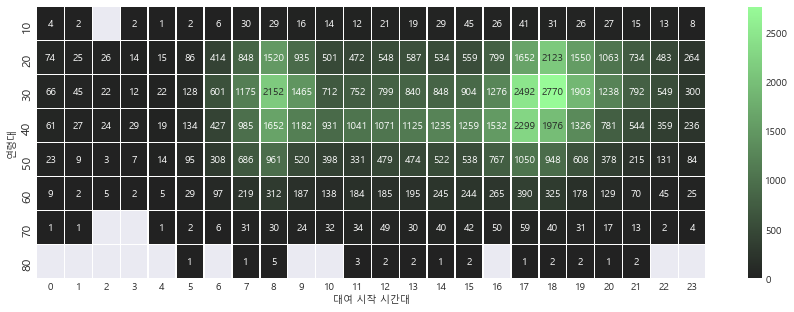

In [21]:
fig, ax = plt.subplots(figsize=(15,5))
pal = sns.dark_palette("palegreen", as_cmap=True) # color palette 설정
sns.heatmap(base, 
            annot=True, # 셀에 숫자 표기
            ax=ax, # 위에서 만들어 둔 캔버스의 (Matplotlib) Axes
            linewidths=.5, # 셀을 나눌 선의 너비
            fmt='.0f', # 소수점 자리 처리
            cmap=pal) 
plt.ylabel('연령대')
plt.xlabel('대여 시작 시간대')  
plt.yticks(fontsize=12)
plt.show()

> 20-40대 전부 출퇴근시간대(7-9, 17-19)에 비출퇴근시간대에 비해 2배 이상의 대여기록을 보인다. <br/> 40대는 비교적으로 비출퇴근시간대에서도 유사한 양상의 대여 패턴을 보인다.

In [22]:
# 30대, 40대만 떼어서 보자
df_30s = df.loc[(df['age_bin'] == 30)]
df_40s = df.loc[(df['age_bin'] == 40)]

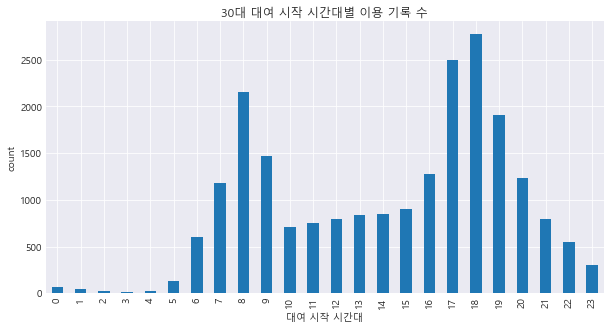

In [23]:
plt.figure(figsize=(10,5)) 
df_30s['start_hour'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel('대여 시작 시간대')
plt.ylabel('count')
plt.title('30대 대여 시작 시간대별 이용 기록 수')
plt.show() 

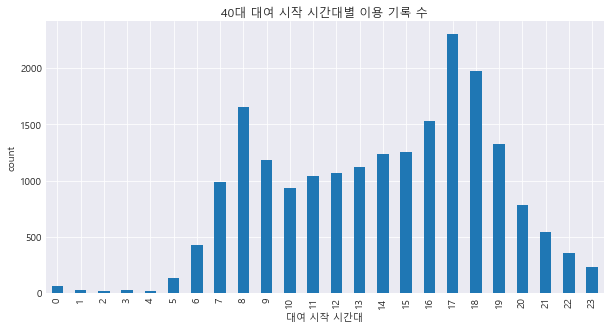

In [24]:
plt.figure(figsize=(10,5)) 
df_40s['start_hour'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel('대여 시작 시간대')
plt.ylabel('count')
plt.title('40대 대여 시작 시간대별 이용 기록 수')
plt.show() 

**해석 보태기**
> * 주 사용 연령층은 30, 40대. 그 외에도 20대까지 출근 시간대(07시 ~ 09시)와 퇴근 시간대(17 ~ 19시)에 유난히 대여를 많이 하는 패턴. 이 시간대를 PEAK 시간대로 설정하고, PEAK 시간대 & 뉴욕에서 출퇴근을 많이 하는 지역에서 바이크를 대여할 때 가격을 1.2 ~ 1.3배 인상하는 실험을 하자
> + 40대는 비교적으로 비 PEAK 시간대(10시 ~ 16시)에서도 타 연령층에 비교하여 대여 패턴이 균등한 편이었다. 그럼 비 PEAK 시간대의 바이크 대여를 늘리고자 할 때 40대를 노려보자. 40대의 낮 시간대 활동에 바이크를 더 활용할 수 있도록 쿠폰을 제공하거나 가격을 할인하는 방식으로 적극적으로 타겟하자

### 3.2

Bike_id (바이크 하나하나에 붙어있는 고유 아이디) 에 따른 trip_duration을 시각화해주세요. trip_duration은 평균(mean)이어도 좋고, 누적(sum)이어도 좋습니다. 해석 보태 주세요.
Groupby 함수 사용해주시면 편합니다.



**누적 집계 선택**<br/> 바이크마다 누적 사용시간을 파악하여 감가상각을 계산하거나, 사용량이 과한 바이크 위주로 수거 & 보수를 진행
<br/> - 데이터 상 한계점: 하루 어치 데이터라는 점, 기간을 개월로 늘려서 보면 확실히 감가상각비 계산 가능

In [25]:
bike_utilization = df.groupby(['bike_id'])['trip_duration'].sum().to_frame()

In [26]:
# trip_duration은 초 단위
bike_utilization['trip_duration_min'] = bike_utilization['trip_duration'] / 60
bike_utilization['trip_duration_hour'] = bike_utilization['trip_duration_min'] / 60
bike_utilization.describe().round() 

,trip_duration,trip_duration_min,trip_duration_hour
count,10147.0,10147.0,10147.0
mean,7431.0,124.0,2.0
std,22090.0,368.0,6.0
min,71.0,1.0,0.0
25%,2891.0,48.0,1.0
50%,5595.0,93.0,2.0
75%,9275.0,155.0,3.0
max,1362517.0,22709.0,378.0


**보고 싶은 정보에 집중, 누적 사용시간 TOP 인 바이크 ID를 추출하자**
<br/>몇 퍼센트? 현재 하루에 돌아가는 고유한 바이크는 1만개 가량. <br/> 하루임을 고려하여 거의 종일 가동된 바이크만 골라내자

In [27]:
# 상위 0.1% 값을 cut_point로 지정
cut_point = bike_utilization["trip_duration_hour"].quantile(0.999) 
bike_cut=bike_utilization[ bike_utilization['trip_duration_hour'] > cut_point ]

In [28]:
bike_cut

,trip_duration,trip_duration_min,trip_duration_hour
bike_id,,,
17354,145354,2422.566667,40.376111
19841,685774,11429.566667,190.492778
21514,145235,2420.583333,40.343056
24983,445775,7429.583333,123.826389
26404,179971,2999.516667,49.991944
26909,434861,7247.683333,120.794722
27371,347749,5795.816667,96.596944
28543,1048853,17480.883333,291.348056
30298,725557,12092.616667,201.543611


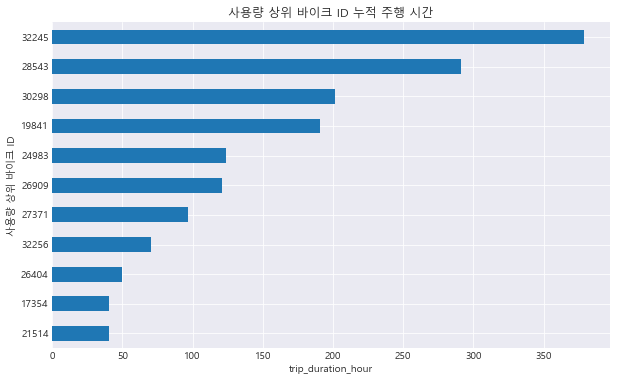

In [34]:
plt.figure(figsize=(10,6))
bike_cut['trip_duration_hour'].sort_values().plot(kind='barh')
plt.xlabel('trip_duration_hour')
plt.ylabel('사용량 상위 바이크 ID')
plt.title('사용량 상위 바이크 ID 누적 주행 시간')
plt.show()

**해석 보태기**
> * 위에 추려진 바이크 ID는 비정상적으로 많이 사용되었으니 고장 가능성이 높거나, 감가상각비가 클 수 있으므로  대상으로 수거 및 보수를 진행하자
* 또는 사용량이 비교적으로 낮았던 바이크와 재배치(위치 교환)하자 

### 3.3

Bike_id, Trip_duration, + 한 가지 변수 더 추가해서 3개 이상 변수 시각화 방식으로 시각화 해주세요. 해석은 안 보태 주셔도 됩니다.

In [30]:
# 3.2에서 골라낸 TOP 바이크들의 사용 기록으로 df_top으로 생성
top_list = bike_cut.index.values
df_top=df[df['bike_id'].isin(top_list)]
df_top

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register,age,age_bin
76,2018-05-01,2018-05-05,2,2,347749,3232,Bond St & Fulton St,40.689622,-73.983043,450,W 49 St & 8 Ave,40.762272,-73.987882,27371,Customer,1969,unknown,44,50,40
406,2018-05-01,2018-05-01,0,0,252,383,Greenwich Ave & Charles St,40.735238,-74.000271,3263,Cooper Square & Astor Pl,40.729515,-73.990753,26404,Subscriber,1988,male,56,31,30
2521,2018-05-01,2018-05-01,6,6,685,402,Broadway & E 22 St,40.740343,-73.989551,450,W 49 St & 8 Ave,40.762272,-73.987882,24983,Subscriber,1986,male,30,33,30
3065,2018-05-01,2018-05-01,7,7,307,498,Broadway & W 32 St,40.748549,-73.988084,484,W 44 St & 5 Ave,40.755003,-73.980144,30298,Subscriber,1968,male,7,51,50
3860,2018-05-01,2018-05-01,7,7,448,495,W 47 St & 10 Ave,40.762699,-73.993012,499,Broadway & W 60 St,40.769155,-73.981918,24983,Subscriber,1988,male,10,31,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65283,2018-05-01,2018-05-01,20,20,492,402,Broadway & E 22 St,40.740343,-73.989551,453,W 22 St & 8 Ave,40.744751,-73.999154,32245,Subscriber,1963,male,14,56,50
66355,2018-05-01,2018-05-01,20,20,165,486,Broadway & W 29 St,40.746201,-73.988557,402,Broadway & E 22 St,40.740343,-73.989551,32245,Subscriber,1995,male,28,24,20
67912,2018-05-01,2018-05-06,20,21,437994,3077,Stagg St & Union Ave,40.708771,-73.950953,3043,Lewis Ave & Decatur St,40.681460,-73.934903,24983,Customer,1988,male,39,31,30
68489,2018-05-01,2018-05-01,20,21,616,453,W 22 St & 8 Ave,40.744751,-73.999154,382,University Pl & E 14 St,40.734927,-73.992005,32245,Subscriber,1964,male,44,55,50


In [31]:
# 바이크별로 다녀온 start station 고유 수
bike_cut['station_count'] = df_top.groupby(['bike_id'])['start_station_id'].nunique()

In [32]:
bike_cut

,trip_duration,trip_duration_min,trip_duration_hour,station_count
bike_id,,,,
17354,145354,2422.566667,40.376111,7
19841,685774,11429.566667,190.492778,9
21514,145235,2420.583333,40.343056,3
24983,445775,7429.583333,123.826389,11
26404,179971,2999.516667,49.991944,2
26909,434861,7247.683333,120.794722,9
27371,347749,5795.816667,96.596944,1
28543,1048853,17480.883333,291.348056,3
30298,725557,12092.616667,201.543611,3


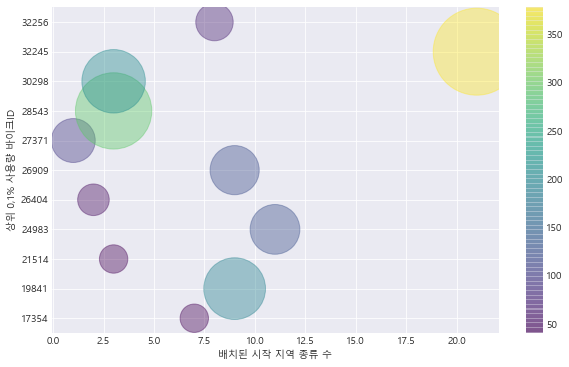

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(bike_cut['station_count'], # x축
            bike_cut.index.values, # y축
            c=bike_cut['trip_duration_hour'], # 색상
            s=bike_cut['trip_duration_hour']*20, # 사이즈 
            # 20을 곱해본 이유는 그래프 사이즈에 맞게 원의 지름을 키워주기 위함
            alpha=0.4, # 투명도
            cmap='viridis') # 컬러바 종류
plt.colorbar()
plt.ylabel('상위 0,1% 사용량 바이크ID')
plt.xlabel('배치된 시작 지역 종류 수')
# plt.xticks(rotation=90) # x축에 종류가 많으면 label 돌려주기
plt.show()

**해석 보태기**
> * 여기 저기 옮겨 다니며 사용이 많이 된 바이크 32245 : 누적 주행 시간이 가장 많음
* 대부분 하루 안에 10개 이하의 시작 지역을 다녀온다
* 추가 보고싶은 부분: 누적 주행시간이 많았던 바이크들의 이동 경로